<a href="https://colab.research.google.com/github/trilgar/IAD2023/blob/main/CP7_%D0%97%D0%B0%D1%80%D0%B8%D1%86%D1%8C%D0%BA%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size="6"><b>Комп'ютерний практикум 7.

<center><b> Методи класифікації </font>


<center><b><i><font size="4"> KNN (K Nearest Neighbors Algorithm)

DT (Decision Tree Algorithm)</b></center>


##<center>__Самостійні завдання__</center>

> Скопіювати блок самостійних завдань в окремий файл ***LastName_CP7.ipynb***

> Інсталюйте необхідні пакети бібліотек Python

### Завдання №1

* Завантажте дані з лінку

`url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"`

<center><img src="http://sebastianraschka.com/images/blog/2015/principal_component_analysis_files/iris.png" width="600" alt="content-vs-colab.png"></center>

* задайте наступні імена колонок датафрейму:

`names=['sepal length','sepal width','petal length','petal width','class label']`
* виведіть описову статистику датасету
* сформуйте масив характеристик $X$ та цільової змінної/класу $Y$ 
* виведіть кількість елементів у кожному класі
* поділіть вибірку на навчальну та тестову у співвідношенні 30/70
 


In [45]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class label'])

# виведення описової статистики
print(data.describe())

       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [46]:
import numpy as np

# формування масивів X та Y
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

# виведення кількості елементів у кожному класі
unique, counts = np.unique(Y, return_counts=True)
print(dict(zip(unique, counts)))

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}


In [53]:
from sklearn.model_selection import train_test_split

# поділ даних на навчальну та тестову вибірки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=42)

# виведення розміру навчальної та тестової вибірок
print("Розмір навчальної вибірки:", X_train.shape[0])

Розмір навчальної вибірки: 45


### Завдання №2

* Проведіть стандартизацію даних
* застосуйте алгоритм kNN для $k=3$, $k=5$, використовуючи евклідову метрику та манхеттенську метрику
* порівняйте результати точності для цих моделей
* визначіть оптимальне $k$ за допомогою `GridSearchCV`
* зробіть висновки


In [55]:
from sklearn.preprocessing import StandardScaler

# стандартизація даних
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [3, 5]
distances = ['euclidean', 'manhattan']

for k in k_values:
    for distance in distances:
        model = KNeighborsClassifier(n_neighbors=k, metric=distance)
        model.fit(X_train_std, Y_train)
        y_pred = model.predict(X_test_std)
        accuracy = accuracy_score(Y_test, y_pred)
        print(f"k={k}, distance={distance}: accuracy={accuracy:.3f}")

k=3, distance=euclidean: accuracy=0.943
k=3, distance=manhattan: accuracy=0.943
k=5, distance=euclidean: accuracy=0.933
k=5, distance=manhattan: accuracy=0.933


In [62]:
from sklearn.model_selection import GridSearchCV

# задаємо діапазон значень параметра k, які будуть перевірятися
k_range = list(range(1, 30))

# задаємо параметри для GridSearchCV
param_grid = dict(n_neighbors=k_range)

# ініціалізуємо модель kNN
knn = KNeighborsClassifier()

# визначаємо оптимальне значення параметра k за допомогою GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_std, Y_train)

# виводимо оптимальне значення параметра k та досягнуту точність
print("Найкращий параметр k: ", grid.best_params_)
print("Найкраща досягнута точність: ", grid.best_score_)

Найкращий параметр k:  {'n_neighbors': 3}
Найкраща досягнута точність:  0.9550000000000001


Найкращою є модель з k=3. Це показав як наш підбір вручну, так і підбір за допомогою GridSearchCV.

### Завдання №3

* Проведіть стандартизацію даних
* застосуйте алгоритм дерева рішень з критерієм `entropy` 
* візуалізуйте дерево
* оцініть точність класифікації
* застосуйте алгоритм дерева рішень з критерієм `gini` 
* візуалізуйте дерево
* оцініть точність класифікації
* визначіть оптимальну кількість характеристик в моделі та глибину дерева за допомогою `GridSearchCV`
* зробіть висновки

In [69]:
from sklearn.tree import DecisionTreeClassifier

# створюємо об'єкт класифікатора DecisionTreeClassifier з критерієм entropy
dt = DecisionTreeClassifier(criterion='entropy')

# навчаємо модель на тренувальному датасеті
dt.fit(X_train_std, Y_train)

# робимо передбачення на тестовому датасеті
y_pred = dt.predict(X_test_std)

# виводимо точність моделі
accuracy = accuracy_score(Y_test, y_pred)
print("Точність моделі: ", accuracy)

Точність моделі:  0.9238095238095239


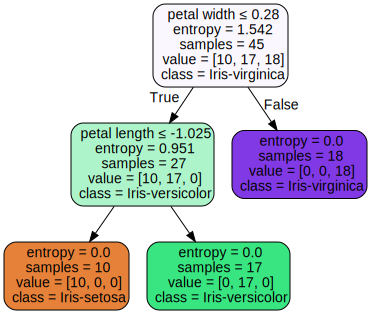

In [66]:
from sklearn.tree import export_graphviz
import graphviz

# визначаємо параметри для візуалізації дерева
dot_data = export_graphviz(dt, out_file=None, 
                feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],  
                class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],  
                filled=True, rounded=True,  
                special_characters=True)

# створюємо та візуалізуємо граф
graph = graphviz.Source(dot_data)
graph

In [67]:
# створюємо об'єкт класифікатора DecisionTreeClassifier з критерієм gini
dt = DecisionTreeClassifier(criterion='gini')

# навчаємо модель на тренувальному датасеті
dt.fit(X_train_std, Y_train)

# робимо передбачення на тестовому датасеті
y_pred = dt.predict(X_test_std)

# виводимо точність моделі
accuracy = accuracy_score(Y_test, y_pred)
print("Точність моделі: ", accuracy)

Точність моделі:  0.9238095238095239


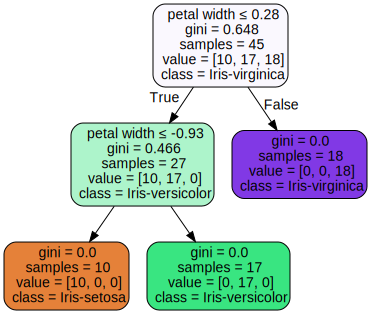

In [68]:
from sklearn.tree import export_graphviz
import graphviz

# визначаємо параметри для візуалізації дерева
dot_data = export_graphviz(dt, out_file=None, 
                feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],  
                class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],  
                filled=True, rounded=True,  
                special_characters=True)

# створюємо та візуалізуємо граф
graph = graphviz.Source(dot_data)
graph

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Задаємо параметри, які будемо шукати
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'max_features': ['sqrt', 'log2', None]
}

# Створюємо модель дерева рішень
tree = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Застосовуємо GridSearchCV
grid_search = GridSearchCV(tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train_std, Y_train)

# Виводимо оптимальні параметри
print("Оптимальна глибина дерева:", grid_search.best_params_['max_depth'])
print("Оптимальна кількість характеристик:", grid_search.best_params_['max_features'])

y_pred = grid_search.predict(X_test_std)
print("Точність моделі: ", accuracy_score(Y_test, y_pred))

Оптимальна глибина дерева: 2
Оптимальна кількість характеристик: None
Точність моделі:  0.9238095238095239


### Завдання №4

Порівняйте результати класифікації методами kNN та дерева рішень для заданого набору даних

Як бачимо, дерево рішень трохи гірше справилося з завданням. Але в середньому одидва методи показували однакову точність. 